# Segmentación de Clientes de Tarjeta de Credito

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn


## Leer archivo

In [2]:
datos_credito = pd.read_csv('CC_GENERAL.csv')

In [3]:
datos_credito.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


## Análisis Exploratorio

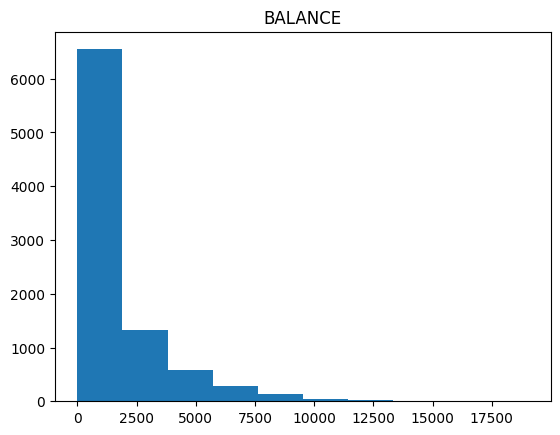

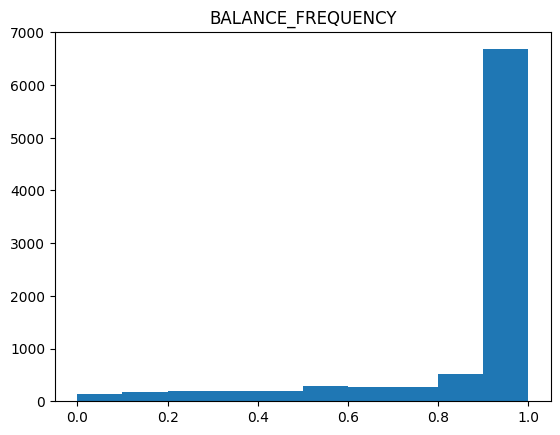

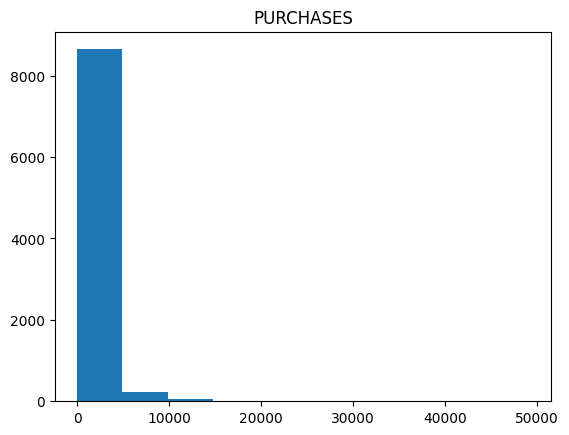

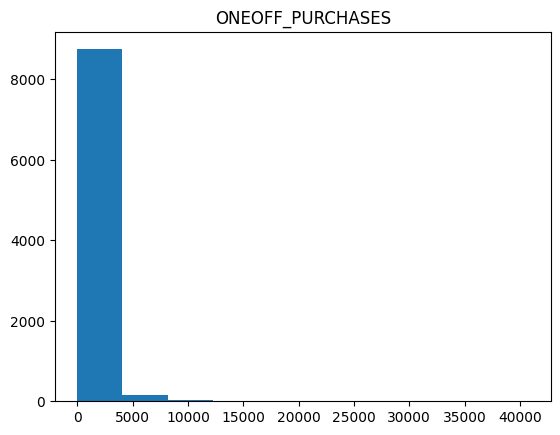

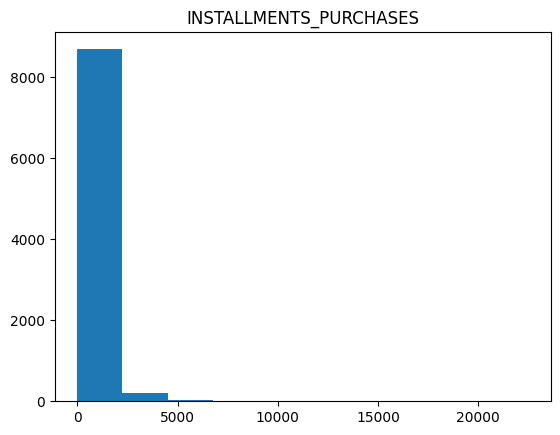

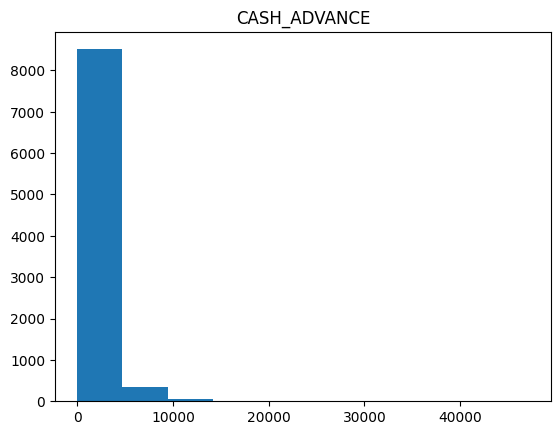

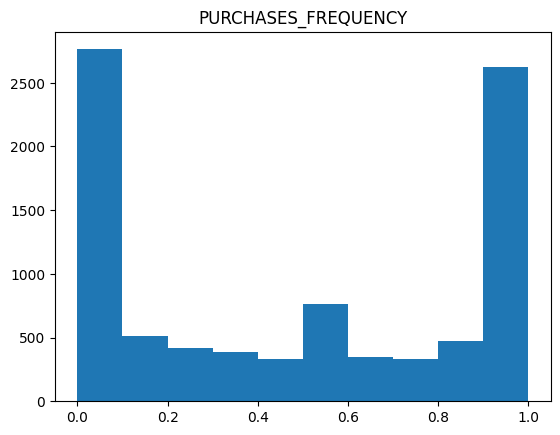

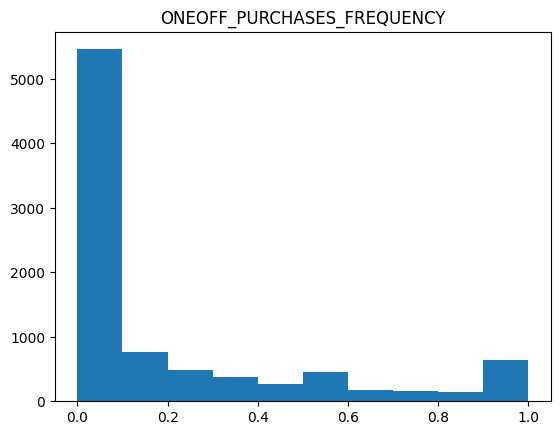

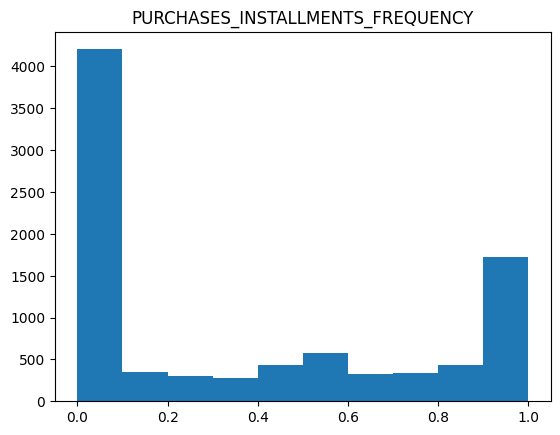

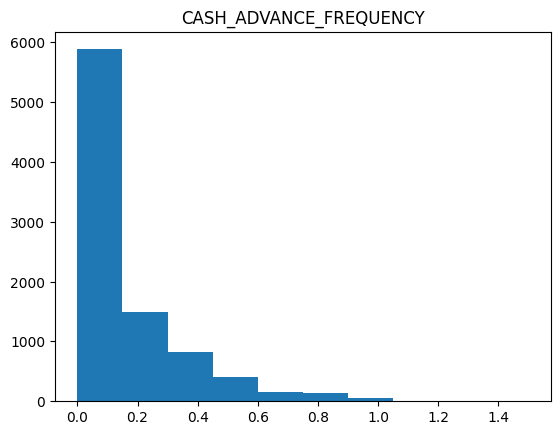

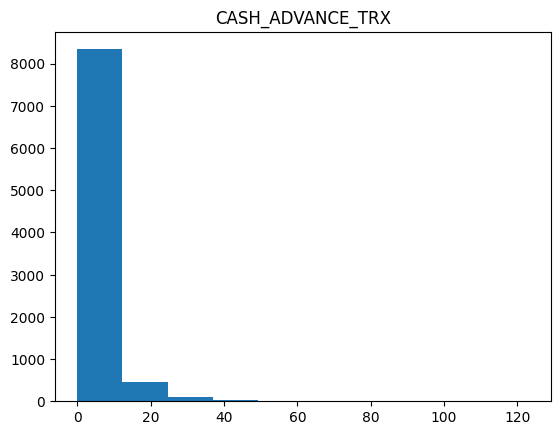

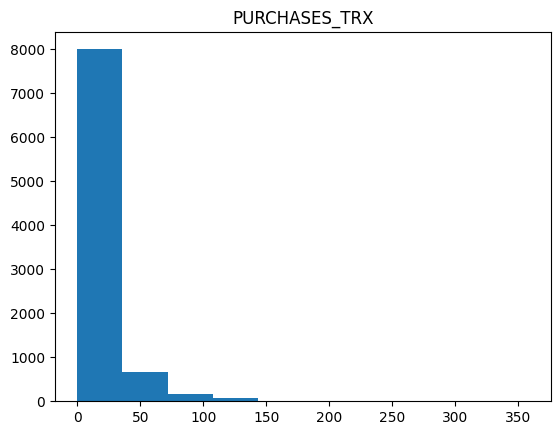

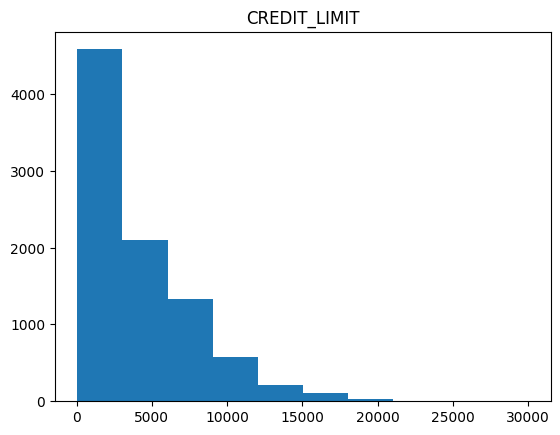

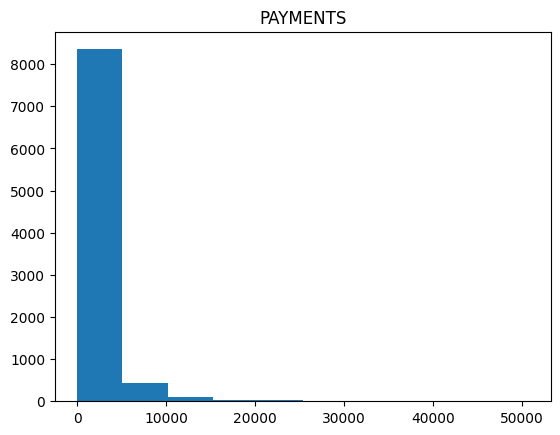

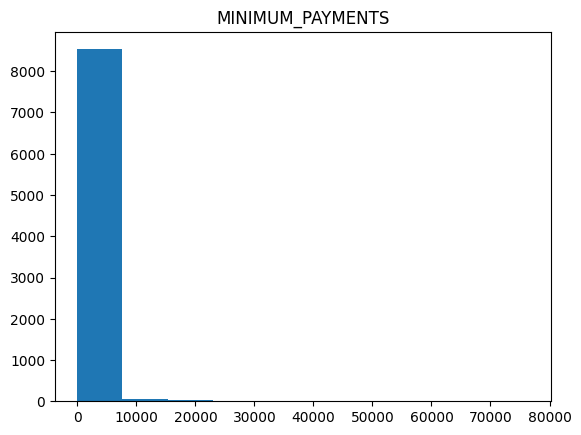

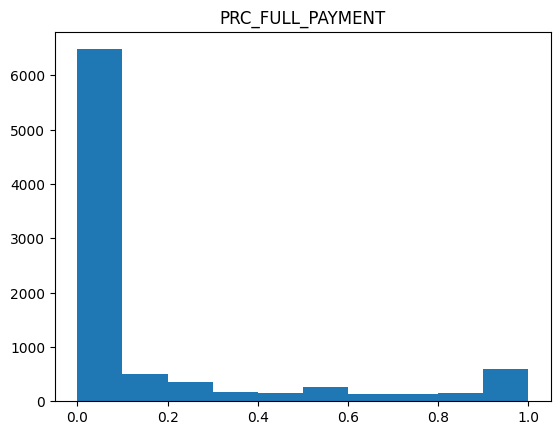

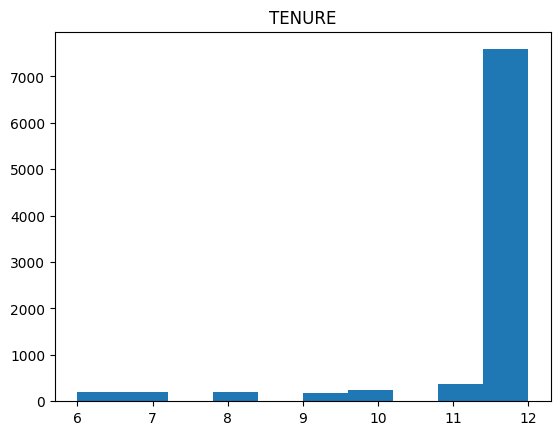

In [4]:
num_cols = datos_credito.select_dtypes(include='number')

for col in num_cols.columns:
    plt.hist(num_cols[col])
    plt.title(col)
    plt.show()


In [5]:
datos_credito.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

## Limpieza de Datos

In [6]:
mediana_credit_limit = datos_credito['CREDIT_LIMIT'].median()
mediana_minimum_payment = datos_credito['MINIMUM_PAYMENTS'].median()

In [7]:
datos_credito['CREDIT_LIMIT'].fillna(mediana_credit_limit, inplace=True)
datos_credito['MINIMUM_PAYMENTS'].fillna(mediana_minimum_payment, inplace=True)

In [8]:
datos_credito.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [9]:
datos_credito.drop('CUST_ID', axis=1, inplace=True)
datos_credito = datos_credito[['BALANCE', 'PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY', 'CASH_ADVANCE_FREQUENCY', 'CREDIT_LIMIT', 'PAYMENTS']]

In [10]:
datos_credito_scale = datos_credito.copy()

In [11]:
from sklearn.preprocessing import StandardScaler

# crear un objeto StandardScaler
scaler = StandardScaler()

# escalar los valores en df_copy
datos_credito_scale = scaler.fit_transform(datos_credito_scale)

## Aplicación de K-Means

#### Primero Metodo de Elbow

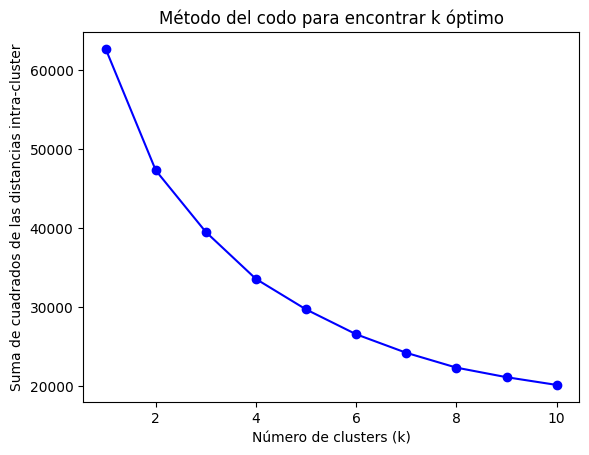

In [12]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# crear una lista vacía para almacenar los valores de la suma de cuadrados
ssd = []

# probar diferentes valores de k
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0, n_init=10)
    kmeans.fit(datos_credito_scale)
    ssd.append(kmeans.inertia_)

# graficar la curva del codo
plt.plot(range(1, 11), ssd, 'bo-')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Suma de cuadrados de las distancias intra-cluster')
plt.title('Método del codo para encontrar k óptimo')
plt.show()


#### Me decidi por 4 clusteres

In [13]:
# crear un objeto KMeans
kmeans = KMeans(n_clusters=4, random_state=0, n_init=10)

# ajustar los datos a k-means
kmeans.fit(datos_credito_scale)

# obtener las etiquetas de los clusters
labels = kmeans.labels_

In [14]:
print(labels)

[3 2 1 ... 1 3 3]


In [15]:
datos_credito['cluster'] = labels
datos_credito['cluster'] = datos_credito['cluster'] + 1
datos_credito_scale = pd.DataFrame(datos_credito_scale)
datos_credito_scale.columns = ['BALANCE', 'PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY', 'CASH_ADVANCE_FREQUENCY', 'CREDIT_LIMIT', 'PAYMENTS']
datos_credito_scale['cluster'] = labels
datos_credito_scale['cluster'] = datos_credito_scale['cluster'] + 1

## Graficas de Caracteristicas de los Clusteres

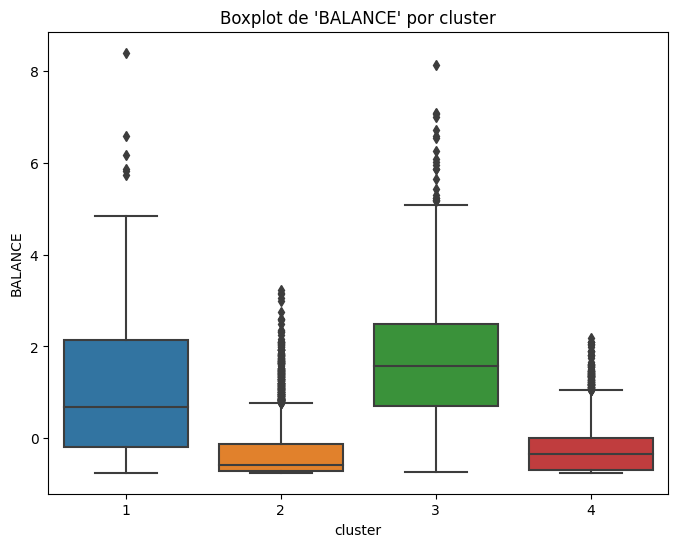

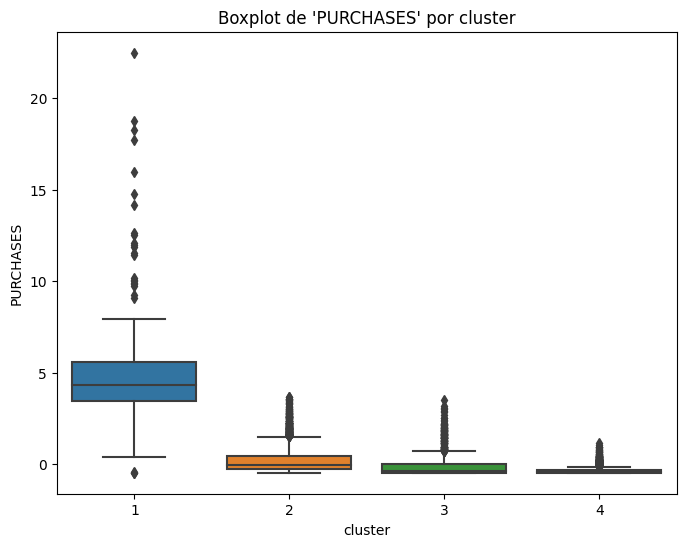

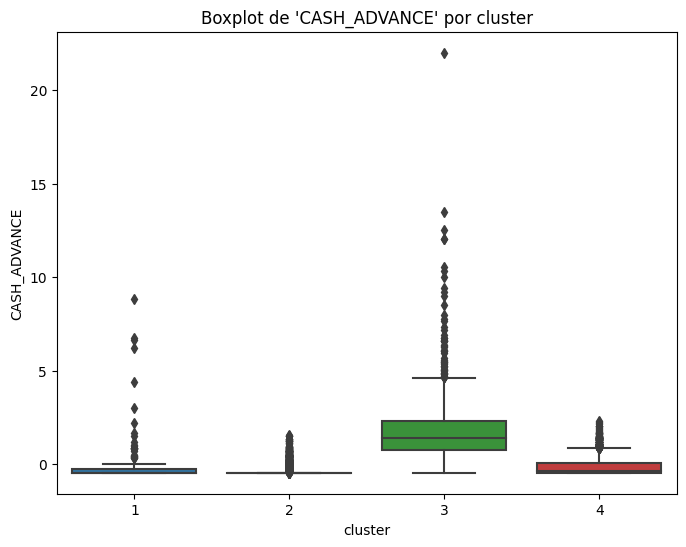

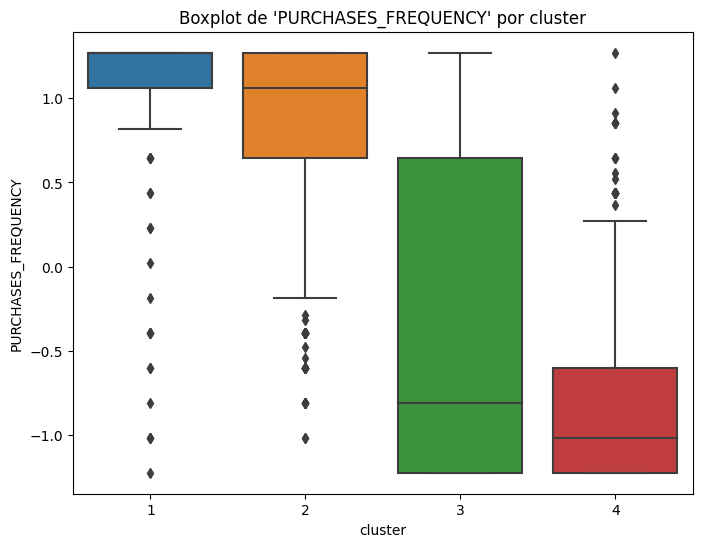

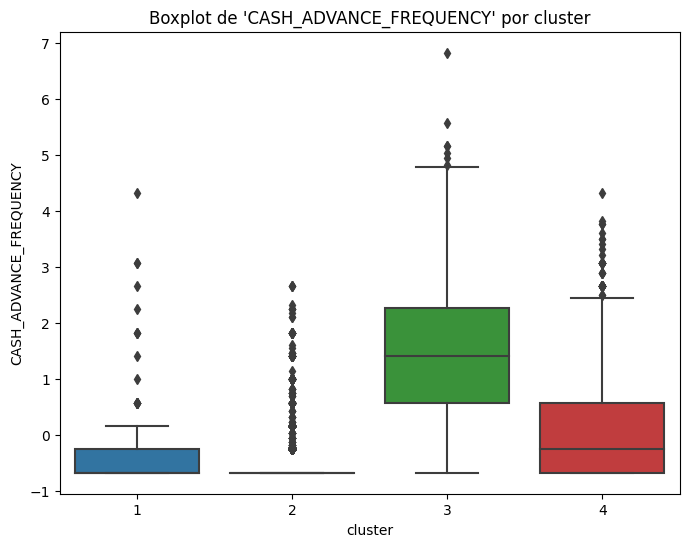

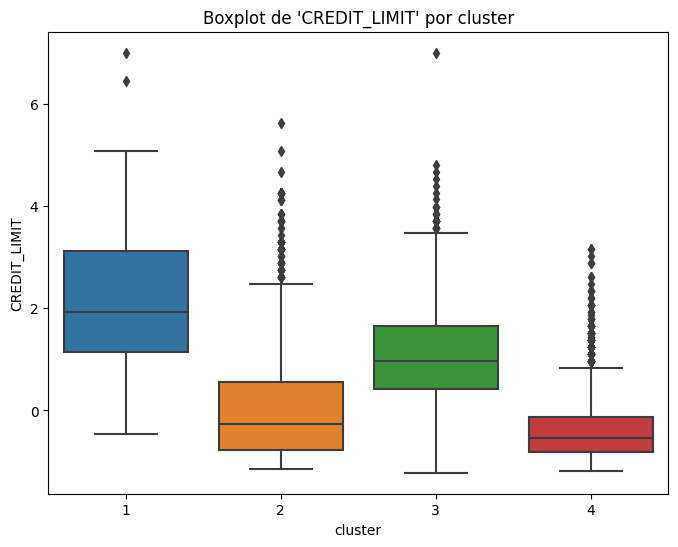

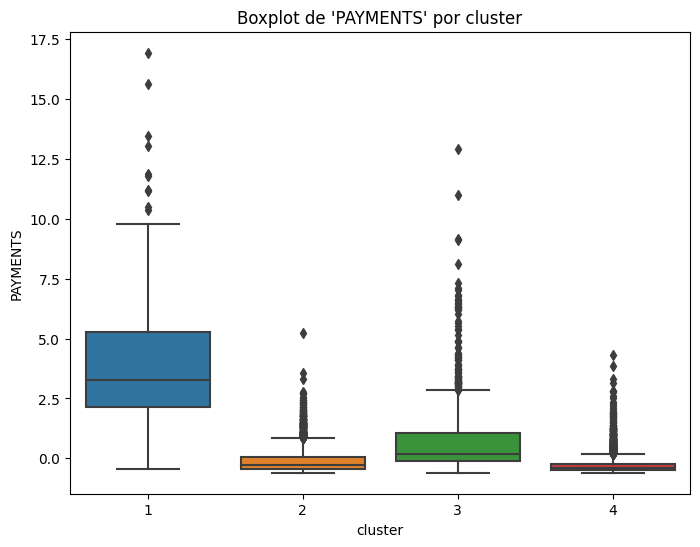

In [16]:
for col in datos_credito_scale.select_dtypes(include='number').columns:
    if col != 'cluster':
        plt.figure(figsize=(8, 6))
        sns.boxplot(x='cluster', y=col, data=datos_credito_scale)
        plt.title(f"Boxplot de '{col}' por cluster")
        plt.show()

## Tabla de Caracteristicas de los Clusteres

In [17]:
print("Mediana por Cluster")
print(datos_credito.groupby('cluster').median())

Mediana por Cluster
             BALANCE  PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
cluster                                                              
1        2983.238551  10210.490      0.000000             1.000000   
2         368.367166    933.800      0.000000             0.916667   
3        4830.368720    200.635   3858.835665             0.166667   
4         863.821682     57.660    207.390596             0.083333   

         CASH_ADVANCE_FREQUENCY  CREDIT_LIMIT      PAYMENTS  
cluster                                                      
1                      0.000000       11500.0  11161.167655  
2                      0.000000        3500.0    984.393603  
3                      0.416667        8000.0   2211.031343  
4                      0.083333        2500.0    536.361045  


In [19]:
print("Cantidad por Cluster")
print(datos_credito.groupby('cluster')['cluster'].count())

Cantidad por Cluster
cluster
1     134
2    3853
3    1156
4    3807
Name: cluster, dtype: int64


## Conclusiones

Se conforman 4 clústeres de Consumidores diferentes con las siguientes características
1. Consumidores de balance mediano-alto con compras frecuentes que no usan efectivo y altos pagos y límite de crédito.
2. Consumidores de balance bajo con compras frecuentes que no usan efectivo
3. Consumidores de alto balance, pero compras infrecuentes que suelen usar efectivo y límite de crédito mediano alto
4. Consumidores de balance mediano bajo con compras infrecuentes que suelen usar efectivo y límite de crédito bajo.

En Resumen, los 4 clústeres básicamente se dividen por nivel de consumo relativo y nivel adquisitivo siendo el más frecuente el clúster 2 de consumidores con bajo poder adquisitivo
pero alto nivel de consumo relativo, seguido por el clúster 4 de bajo poder adquisitivo, pero estilo de vida austero y el clúster 3 de alto nivel adquisitivo, pero estilo de vida austero
y por último el clúster 1 de alto poder adquisitivo pero alto nivel de consumo relativo. 


## Salvar joblib de scaler y kmean como Pipeline para futuro despliegue de app

In [20]:
from sklearn.pipeline import Pipeline
from joblib import dump

# Crear el pipeline
pipeline = Pipeline([
    ('scaler', scaler),
    ('kmeans', kmeans)
])

# Guardar el pipeline como un archivo joblib
dump(pipeline, 'pipeline.joblib')

['pipeline.joblib']

## Probar Objeto

In [22]:
from joblib import load

# Cargar el pipeline desde el archivo guardado
pipeline = load('pipeline.joblib')

datos_credito_prueba = datos_credito[:100]
cluster = datos_credito_prueba['cluster']
datos_credito_prueba.drop('cluster', axis=1, inplace=True)
new_cluster = pipeline.predict(datos_credito_prueba)
datos_credito_prueba['cluster'] = cluster
datos_credito_prueba['new_cluster'] = new_cluster
datos_credito_prueba['new_cluster'] = datos_credito_prueba['new_cluster'] + 1

datos_credito_prueba.head()

C:\Users\AXEL ALEMAN\AppData\Local\Temp\ipykernel_24592\2041663367.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos_credito_prueba.drop('cluster', axis=1, inplace=True)
C:\Users\AXEL ALEMAN\AppData\Local\Temp\ipykernel_24592\2041663367.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos_credito_prueba['cluster'] = cluster
C:\Users\AXEL ALEMAN\AppData\Local\Temp\ipykernel_24592\2041663367.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See th

,BALANCE,PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,CASH_ADVANCE_FREQUENCY,CREDIT_LIMIT,PAYMENTS,cluster,new_cluster
0,40.900749,95.40,0.000000,0.166667,0.000000,1000.0,201.802084,4,4
1,3202.467416,0.00,6442.945483,0.000000,0.250000,7000.0,4103.032597,3,3
2,2495.148862,773.17,0.000000,1.000000,0.000000,7500.0,622.066742,2,2
3,1666.670542,1499.00,205.788017,0.083333,0.083333,7500.0,0.000000,4,4
4,817.714335,16.00,0.000000,0.083333,0.000000,1200.0,678.334763,4,4
